In [1]:
import numpy as np 

import pandas as pd 


import matplotlib.pyplot as plt 

import seaborn as sns 


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/2.%20Basic%20Algorithms/2.4%20Accuracy_regularization/athletes.csv", encoding = "utf-8")

In [3]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [4]:
df.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [5]:
df["height"] = df.height.fillna(df.height.median()) 

df["weight"] = df.height.fillna(df.height.median()) 


In [6]:
df.isnull().sum()

id             0
name           0
nationality    0
sex            0
dob            1
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

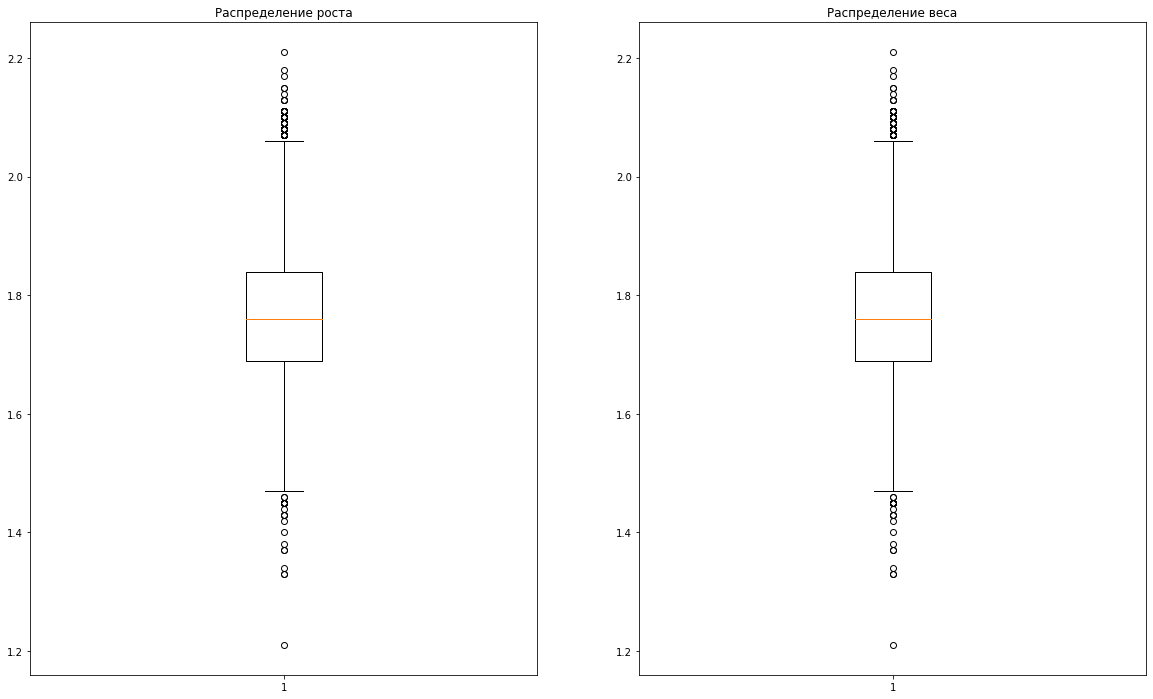

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (20, 12))
axs = axs.ravel()

axs[0].boxplot(df.height)
axs[0].set_title("Распределение роста")
axs[1].boxplot(df.weight)
axs[1].set_title("Распределение веса")
plt.show()

In [8]:
df.sex.value_counts()

male      6333
female    5205
Name: sex, dtype: int64

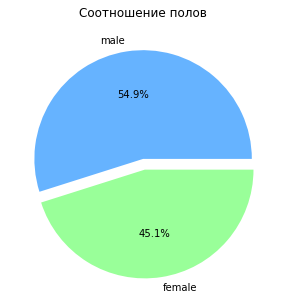

In [9]:
plt.figure(figsize = (5, 5))
explode = (0., 0.1)

plt.pie(df.sex.value_counts(), labels = ["male", "female"], autopct='%1.1f%%', explode = explode, colors = ['#66b3ff', '#99ff99'])

plt.title("Соотношение полов")

plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [11]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766102,1.766102,0.057722,0.056769,0.061016
std,2.908648e+08,0.111100,0.111100,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,1.210000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,1.690000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,1.760000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,1.840000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,2.210000,5.000000,2.000000,2.000000


In [12]:
df.corr()

,id,height,weight,gold,silver,bronze
id,1.000000,0.004272,0.004272,0.008290,-0.020803,0.011978
height,0.004272,1.000000,1.000000,0.049467,0.040952,0.020982
weight,0.004272,1.000000,1.000000,0.049467,0.040952,0.020982
gold,0.008290,0.049467,0.049467,1.000000,0.024349,0.004682
silver,-0.020803,0.040952,0.040952,0.024349,1.000000,-0.014844
bronze,0.011978,0.020982,0.020982,0.004682,-0.014844,1.000000


In [13]:
y = df.sex

X = df[["height", "weight", "sport", "gold", "silver", "bronze"]]

In [14]:
X.sport.unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

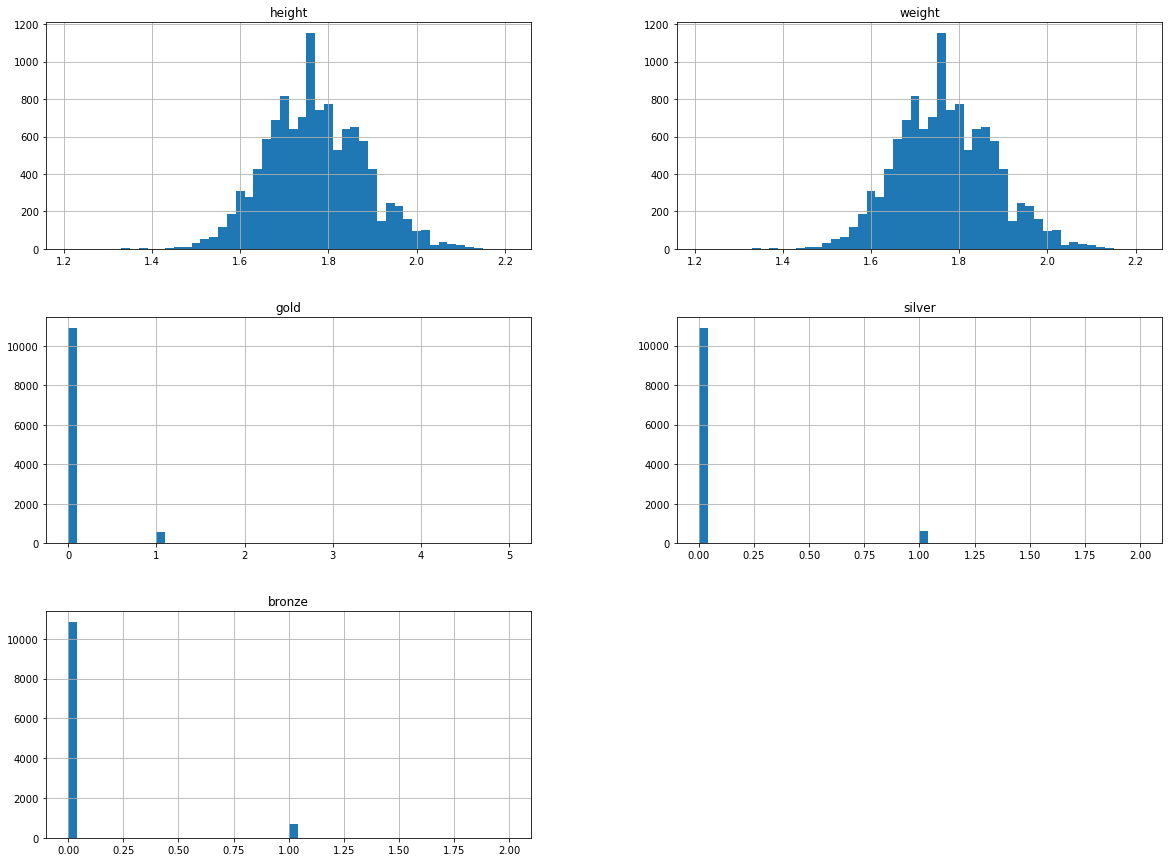

In [15]:
X.hist(bins = 50, figsize = (20, 15))

plt.show()

In [16]:
X = pd.get_dummies(X, columns = ["sport"])

In [17]:
sex_v = {"male": 1, "female": 0}

y = y.replace(sex_v)

In [18]:
y

0        1
1        0
2        1
3        1
4        1
        ..
11533    0
11534    0
11535    1
11536    1
11537    1
Name: sex, Length: 11538, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report 

from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score

In [20]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, shuffle = True, random_state = 44)

In [22]:
lg = LogisticRegression()

In [23]:
LogisticRegression(C = 1.0)# Параметр регуляризации

LogisticRegression()

In [24]:
lg.fit(X_train, y_train)

LogisticRegression()

In [25]:
pred = lg.predict_proba(X_test)

y_pred = lg.predict(X_test)

In [26]:
pr, re, thres = precision_recall_curve(y_test, pred[:, 1])

In [27]:
pr

array([0.54455323, 0.54449678, 0.54456427, ..., 1.        , 1.        ,
       1.        ])

In [28]:
re

array([1.00000000e+00, 9.99772417e-01, 9.99772417e-01, ...,
       4.55166136e-04, 2.27583068e-04, 0.00000000e+00])

In [29]:
len(thres)

2101

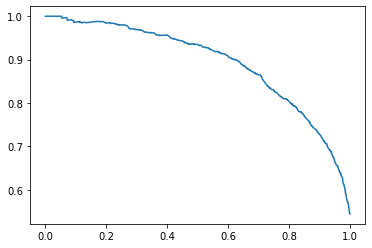

In [30]:
plt.plot(re, pr)

In [31]:
pr, re, thres = roc_curve(y_test, pred[:, 1])

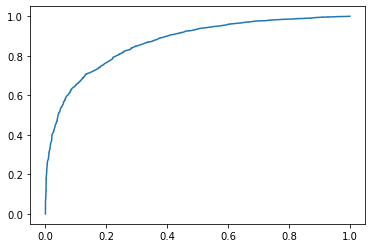

In [32]:
plt.plot(pr, re)

In [33]:
cross_val_score(lg, X, y, cv = 10, scoring = "accuracy")

C:\Users\User\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

array([0.79116118, 0.78509532, 0.80762565, 0.77989601, 0.76516464,
       0.79029463, 0.78422877, 0.80762565, 0.78837814, 0.78837814])

In [34]:
accuracy_score(y_test, y_pred)

0.7846972885972514

In [35]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [37]:
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 20, max_features = 0.8), n_estimators = 20, learning_rate = 0.1)

#shift + tab при наведении черты на алгоритм- можно посмотреть все параметры моделей/алгоритмов

In [38]:
clf_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         max_features=0.8,
                                                         min_samples_leaf=20),
                   learning_rate=0.1, n_estimators=20)

In [50]:
y_ada_pred_test = clf_ada.predict_proba(X_test)[:, 1]

y_ada_pred_train = clf_ada.predict_proba(X_train)[:, 1]

In [49]:
y_ada_pred_test

array([0.55251715, 0.83135963, 0.47274887, ..., 0.99948184, 0.40887664,
       0.7291264 ])

In [55]:
pre, ree, thres = roc_curve(y_test, y_ada_pred_test)

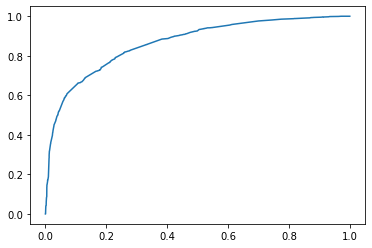

In [56]:
plt.plot(pre, ree)

C:\Users\User\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\lib\site-packages\sklearn\model_selection\_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positional argument: 'y'

  warnings.warn(some_fits_failed_message, FitFailedWarning)


array([nan, nan, nan, nan, nan])

In [59]:
y_ada_pred_test1 = clf_ada.predict(X_test)

classification_report(y_test, y_ada_pred_test1)

'              precision    recall  f1-score   support\n\n           0       0.75      0.77      0.76      3683\n           1       0.80      0.79      0.80      4394\n\n    accuracy                           0.78      8077\n   macro avg       0.78      0.78      0.78      8077\nweighted avg       0.78      0.78      0.78      8077\n'

In [61]:

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.74      0.76      3683\n           1       0.79      0.83      0.81      4394\n\n    accuracy                           0.78      8077\n   macro avg       0.78      0.78      0.78      8077\nweighted avg       0.78      0.78      0.78      8077\n'

In [62]:
clf_gbm = GradientBoostingClassifier(max_depth = 5, min_samples_leaf = 20, n_estimators = 20, subsample = 1.0, max_features = 0.8, verbose = 2)

In [64]:
clf_gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3012            0.19s
         2           1.2434            0.12s
         3           1.1946            0.12s
         4           1.1553            0.10s
         5           1.1192            0.11s
         6           1.0894            0.09s
         7           1.0641            0.08s
         8           1.0412            0.08s
         9           1.0220            0.07s
        10           1.0050            0.06s
        11           0.9893            0.06s
        12           0.9751            0.05s
        13           0.9635            0.04s
        14           0.9526            0.04s
        15           0.9437            0.03s
        16           0.9342            0.02s
        17           0.9264            0.02s
        18           0.9199            0.01s
        19           0.9123            0.01s
        20           0.9070            0.00s


GradientBoostingClassifier(max_depth=5, max_features=0.8, min_samples_leaf=20,
                           n_estimators=20, verbose=2)

In [68]:
y_test_gb = clf_gbm.predict(X_test)

In [69]:
classification_report(y_test, y_test_gb)

'              precision    recall  f1-score   support\n\n           0       0.76      0.76      0.76      3683\n           1       0.80      0.79      0.80      4394\n\n    accuracy                           0.78      8077\n   macro avg       0.78      0.78      0.78      8077\nweighted avg       0.78      0.78      0.78      8077\n'

In [77]:
import sys
!conda install --yes --prefix {sys.prefix} xgboost 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB
    conda-22.11.1              |   py39haa95532_4         892 KB
    libxgboost-1.5.0           |       hd77b12b_2         1.3 MB
    py-xgboost-1.5.0           |   py39haa95532_2         156 KB
    ruamel.yaml-0.17.21        |   py39h2bbff1b_0         174 KB
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    xgboost-1.5.0              |   py39haa95532_2          15 KB
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost   


InvalidArchiveError("Error with archive C:\\Users\\Владелец\\.conda\\pkgs\\libxgboost-1.5.0-hd77b12b_2\\.cph_tmpr_8wtmm5\\info-libxgboost-1.5.0-hd77b12b_2.tar.zst.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nFailed to open 'C:\\Users\\Владелец\\.conda\\pkgs\\libxgboost-1.5.0-hd77b12b_2\\.cph_tmpr_8wtmm5\\info-libxgboost-1.5.0-hd77b12b_2.tar.zst'")
InvalidArchiveError("Error with archive C:\\Users\\Владелец\\.conda\\pkgs\\conda-22.11.1-py39haa95532_4\\.cph_tmp2imuo6br\\info-conda-22.11.1-py39haa95532_4.tar.zst.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nFailed to open 'C:\\Users\\Владелец\\.conda\\pkgs\\conda-22.11.1-py39haa95532_4\\.cph_tmp2imuo6br\\info-conda-22.11.1-py39haa95532_4.tar.zst'")
InvalidArchiveError("Error with archive C:\\Users\\Владелец\\.conda\\pkgs\\xgboost-1.5.0-py39haa95532_2\\.cph_tmpc8ngt7tf\\info-xgboost-1.5.0-py39haa95532_2.tar.zst.  You probably

In [80]:
params = {"n_estimators": 100, "learning_rate": 0.1, "max_depth": 3, "min_child_weight": 1, "subsample": 1,
         "colsample_bytree": 1, "n_jobs": 4}


clf_cgb = xgboost.XGBClassifier(**params)

NameError: name 'xgboost' is not defined

In [81]:
clf_cgb.fit(X_train, y_train)

NameError: name 'clf_cgb' is not defined